In [12]:
from scipy import signal
import scipy
from scipy.io import wavfile
import numpy as np
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
import matplotlib.pyplot as plt

Text(0, 0.5, 'Normalized Amplitude')

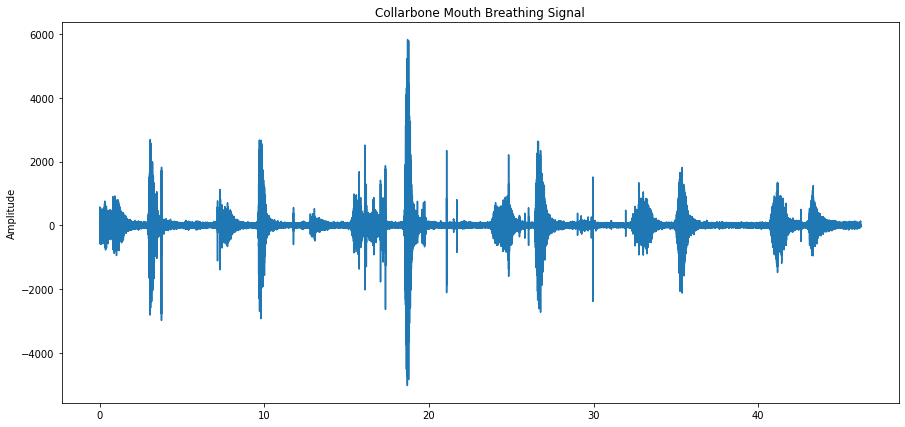

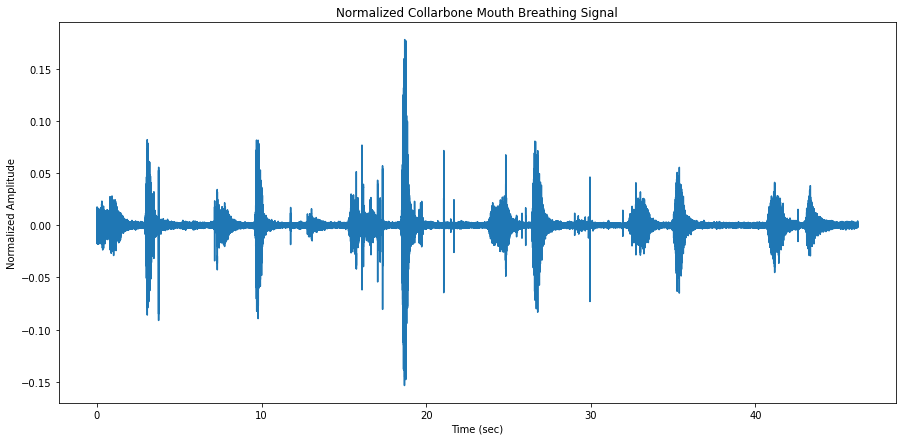

In [69]:
# Load in the sound
fs, data_wav = wavfile.read("data/center-collarbone_mouth-breathe.wav")
timeRange = np.arange(0, len(data_wav)) / fs
leftDataWav = data_wav[:, 0] # The data was recorded with stereo
lengthInSec = data_wav.shape[0] / fs

fig, ax = plt.subplots(nrows=1)
fig.set_figheight(7)
fig.set_figwidth(15)
ax.plot(timeRange, leftDataWav)
ax.set_ylabel('Amplitude')
ax.set_title("Collarbone Mouth Breathing Signal")

fig, ax = plt.subplots(nrows=1)
fig.set_figheight(7)
fig.set_figwidth(15)
leftDataWav = leftDataWav / (2**15)
ax.set_title("Normalized Collarbone Mouth Breathing Signal")
ax.plot(timeRange, leftDataWav)
ax.set_xlabel('Time (sec)')
ax.set_ylabel('Normalized Amplitude')

In [14]:
sampleRate = fs
# Third order butterworth filter
b, a = scipy.signal.butter(3, [500, 5000], btype='bandpass', fs=sampleRate)
# filtered = scipy.signal.lfilter(b, a, leftDataWav)
filtered = scipy.signal.filtfilt(b, a, leftDataWav)

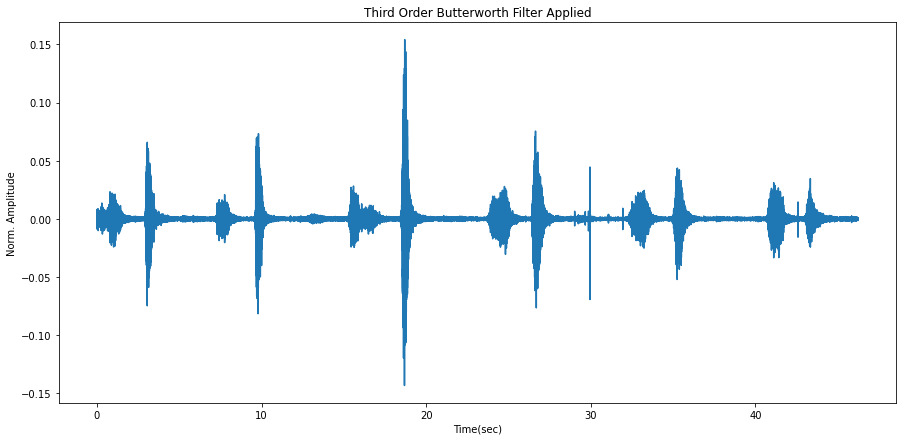

In [61]:
# Plot filtered signal
fig, ax = plt.subplots(nrows=1)
fig.set_figheight(7)
fig.set_figwidth(15)
ax.set_title('Third Order Butterworth Filter Applied')
ax.set_ylabel('Norm. Amplitude')
ax.set_xlabel('Time(sec)')
ax.plot(timeRange, filtered)

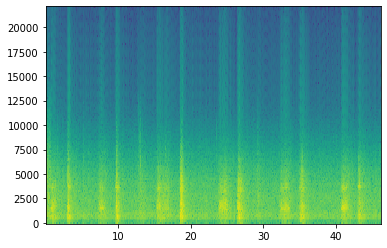

In [75]:
freq, t, specxx = scipy.signal.spectrogram(filtered, fs=sampleRate)
plt.pcolormesh(t, freq, 10*np.log10(specxx))
plt.show()

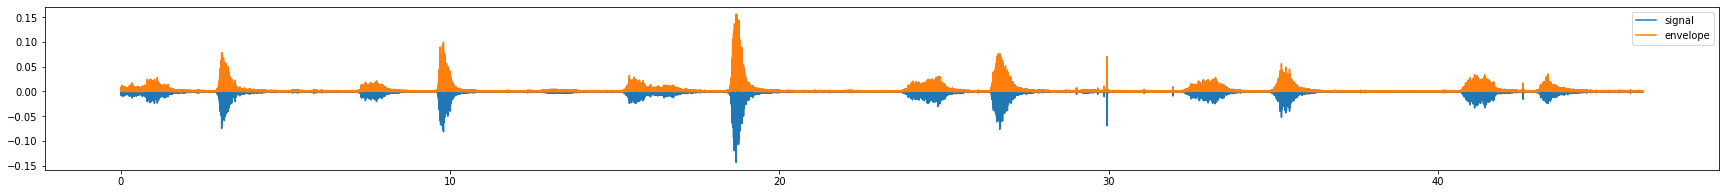

In [16]:

# Hilbert transform not working with the signal?
envelope = np.abs(scipy.signal.hilbert(filtered))
plt.figure(figsize=(30,3))
#newT = np.arange()
plt.plot(timeRange, filtered, label='signal')
plt.plot(timeRange, envelope, label='envelope')
plt.legend()
plt.show()


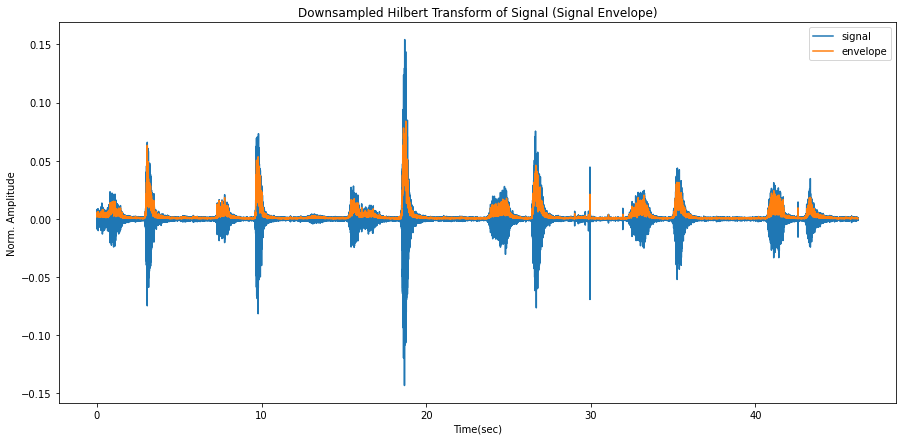

In [63]:
# Downsampling Hilbert transform...helpful?
import math
cnt = int(math.ceil(len(envelope)/int(math.ceil(sampleRate/500))))
downEnv = scipy.signal.resample(envelope, cnt)
t = np.arange(lengthInSec, step=lengthInSec/cnt)

fig, ax = plt.subplots(nrows=1)
fig.set_figheight(7)
fig.set_figwidth(15)

ax.set_title("Downsampled Hilbert Transform of Signal (Signal Envelope)")
ax.set_xlabel('Time(sec)')
ax.set_ylabel('Norm. Amplitude')
ax.plot(timeRange, filtered, label='signal')
ax.plot(t, downEnv, label='envelope')
ax.legend()

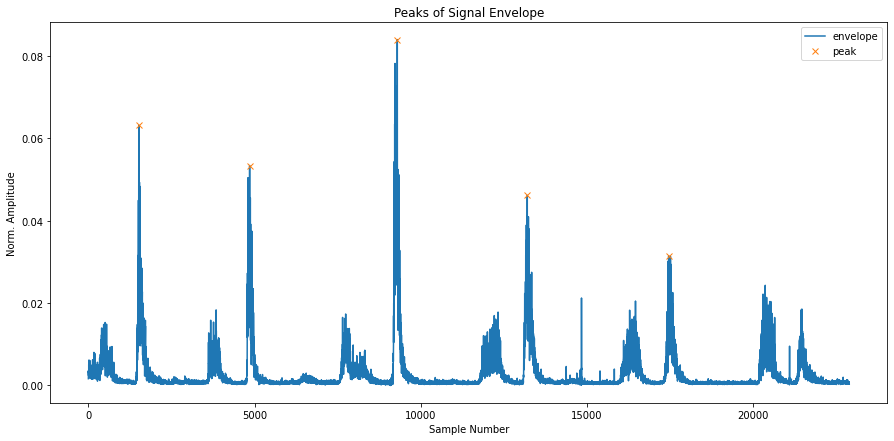

In [70]:
# Find peaks in the signal; 500 samples apart and at least 0.01 high
peaks, _ = scipy.signal.find_peaks(downEnv, distance=500, prominence=0.025)

fig, ax = plt.subplots(nrows=1)

fig.set_figheight(7)
fig.set_figwidth(15)

ax.set_title('Peaks of Signal Envelope')
ax.set_ylabel('Norm. Amplitude')
ax.set_xlabel('Sample Number')
ax.plot(downEnv, label='envelope')
ax.plot(peaks, downEnv[peaks], "x", label='peak')
ax.legend()

In [19]:
exhalesPerSec = len(peaks) / lengthInSec
exhalesPerMin = exhalesPerSec * 60
print("Estimated Exhales Per Minute: ", exhalesPerMin)

Estimated Exhales Per Minute:  6.4911138466792035


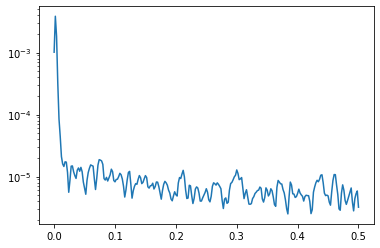

In [45]:
psdFreqs, Pxx_den = scipy.signal.welch(downEnv, nperseg=500)
plt.semilogy(psdFreqs, Pxx_den)
plt.show()

In [44]:
maxIdx = np.argmax(Pxx_den)
print(maxIdx)

print(psdFreqs[1])

1
1.9355859140989644
